# IBM HR Employee Attrition Analysis & Prediction

## Step 1 - Understand the Problem and Objective 

**Objective:** To predict if an employee is going to resign or not. Uncover the factors that lead to employee attrition and explore how each feature is co-related with attrition.

**Dataset:** We are using a dataset put up by IBM for our analysis. The dataset contain 35 features along with Attrition target variable. This is a fictional data set created by IBM data scientists. It can be downloaded from the following link
Link- https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/ or https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Methodology:**
1. Through our analysis we intend to build a model which can predict if an employee is about to quit. 
2. We shall be looking at all variables through some plots and infer about it in our exploratory analysis. 
3. After our exploration we shall build some features based on the variables at hand and take a call on inclusion/exclusion of few variables.

In [1]:
# Loading all the required libraries
%matplotlib inline
import os
import pandas as pd
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (16, 4)

pd.options.display.max_columns = 500

## Step 2 - Understand the Data
Let's look how many observations and features are present in complete dataset. Also, what is the data type of each feature. First few rows of dataset to get an idea how the data value looks.

In [4]:
# Loading IBM HR Employee Attrition dataset
hr_file_name = '../input/WA_Fn-UseC_-HR-Employee-Attrition.csv'

emp_data_org = pd.read_csv(hr_file_name)

print('Dataset dimension: {} rows, {} columns'.format(emp_data_org.shape[0], emp_data_org.shape[1]))

Dataset dimension: 1470 rows, 35 columns


In [5]:
# Metadata of IBM HR Employee Attrition dataset
emp_data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
# Basic statistics of numerical features
emp_data_org.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Thre are few variables which are represented as numerical but they are actually ordered categorical variables i.e. **Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, StockOptionLevel**
- **EmployeeNumber** can be removed as it is an unique representation of Employee and doesn't have any significance with attrition.
- **EmployeCount** has only 1 value which again won't help in our prediction model. 
- **StandardHours** has only one value which is 80, again won't help in our prediction model.

In [7]:
# Basic statistics of categorical features
emp_data_org.describe(include=[np.object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


- **Over18** has only one unique value which represents all employees are above 18 years of age. So, ideally this feature also has no variation adn won't help in our prediction model.

### Attrition Target Variable Distribution

     Attrition  frequency_percent
No        1233              83.88
Yes        237              16.12


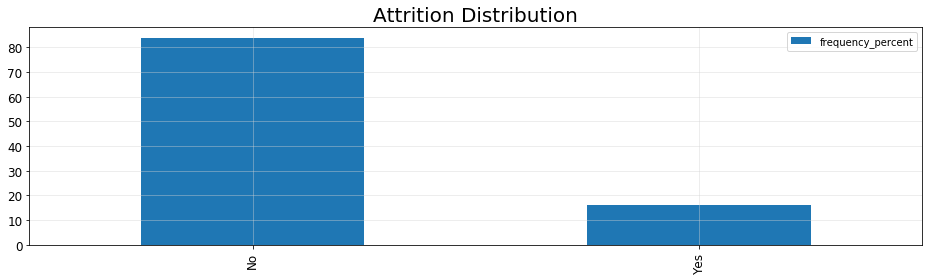

In [8]:
attrition_freq = emp_data_org[['Attrition']].apply(lambda x: x.value_counts())
attrition_freq['frequency_percent'] = round((100 * attrition_freq / attrition_freq.sum()),2)

print(attrition_freq)

# Attrition distribution bar plot
plot = attrition_freq[['frequency_percent']].plot(kind="bar");
plot.set_title("Attrition Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

- Just by a quick inspection of the counts of the number of 'Yes' and 'No' in the target variable tells us that there is quite a large skew in target variable.
- Therefore we have to keep in mind that there is quite a big imbalance in our target variable. Many statistical techniques have been put forth to treat imbalances in data (oversampling or undersampling).
- In this notebook, I will use an oversampling technique known as SMOTE to treat this imbalance.
- We will see the prediction model with and without SMOTE treatment for imbalance class issue.

## Step 3 - Exploratory Data Analysis

### Step 3.1 - Identify Features with NULL values
To understand how each features are impacting the attrition indicator, we need to first handle the null / missing values, otherwise our observations might not be accurate and will lead to wrong conclusions.

In [9]:
null_feat_df = pd.DataFrame()
null_feat_df['Null Count'] = emp_data_org.isnull().sum().sort_values(ascending=False)
null_feat_df['Null Pct'] = null_feat_df['Null Count'] / float(len(emp_data_org))

null_feat_df = null_feat_df[null_feat_df['Null Pct'] > 0]

total_null_feats = null_feat_df.shape[0]
null_feat_names = null_feat_df.index
print('Total number of features having null values: ', total_null_feats)
del null_feat_df

Total number of features having null values:  0


### Step 3.2 - Exploratory Data Analysis - Categorical Features
Let's visualize & understand how different categorical features are behaving against attrition indicator

In [10]:
emp_viz_df = emp_data_org.copy() # Copy cleaned dataset for EDA & feature changes

# Let's add 2 features for EDA: Employee left and not left
emp_viz_df['Attrition_Yes'] = emp_viz_df['Attrition'].map({'Yes':1, 'No':0}) # 1 means Employee Left
emp_viz_df['Attrition_No'] = emp_viz_df['Attrition'].map({'Yes':0, 'No':1}) # 1 means Employee didnt leave

# Let's look into the new dataset and identify features for which plots needs to be build for categorical features
emp_viz_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Attrition_No
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1


In [11]:
cat_col_names = emp_viz_df.select_dtypes(include=[np.object]).columns.tolist() # Get categorical feature names
cat_col_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [12]:
def generate_frequency_graph(col_name):
    
    # Plotting of Employee Attrition against feature
    temp_grp = emp_viz_df.groupby(col_name).agg('sum')[['Attrition_Yes', 'Attrition_No']]
    temp_grp['Percentage Attrition'] =  temp_grp['Attrition_Yes'] / (temp_grp['Attrition_Yes'] + temp_grp['Attrition_No']) * 100
    print(temp_grp)
    emp_viz_df.groupby(col_name).agg('sum')[['Attrition_Yes', 'Attrition_No']].plot(kind='bar', stacked=False, color=['red', 'green'])
    plt.xlabel(col_name)
    plt.ylabel('Attrition');

                   Attrition_Yes  Attrition_No  Percentage Attrition
BusinessTravel                                                      
Non-Travel                    12           138              8.000000
Travel_Frequently             69           208             24.909747
Travel_Rarely                156           887             14.956855


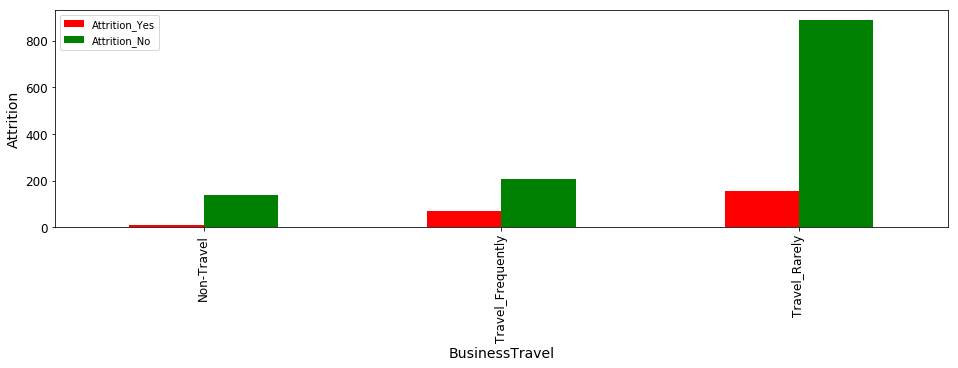

In [13]:
# Plotting of Employee Attrition against Business Travel feature
generate_frequency_graph('BusinessTravel')
# We can see Employee Attrition rate of Travel Frequently is high, then Travel Rarely & then Non-Travel

                        Attrition_Yes  Attrition_No  Percentage Attrition
Department                                                               
Human Resources                    12            51             19.047619
Research & Development            133           828             13.839750
Sales                              92           354             20.627803


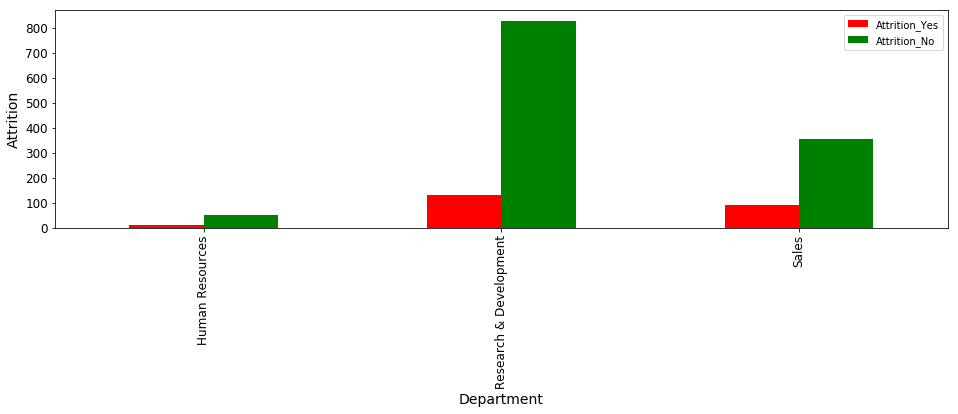

In [14]:
# Plotting of Employee Attrition against Department feature
generate_frequency_graph('Department')
# We can see Employee Attrition rate for Sales department is high then HR and finally Research & Development

        Attrition_Yes  Attrition_No  Percentage Attrition
Gender                                                   
Female             87           501             14.795918
Male              150           732             17.006803


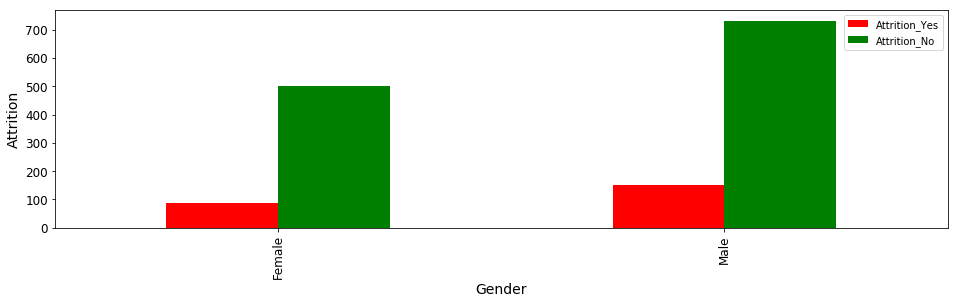

In [15]:
# Plotting of Employee Attrition against Gender feature
generate_frequency_graph('Gender')
# We can see Employee Attrition rate for Male is higher than Female

               Attrition_Yes  Attrition_No  Percentage Attrition
MaritalStatus                                                   
Divorced                  33           294             10.091743
Married                   84           589             12.481426
Single                   120           350             25.531915


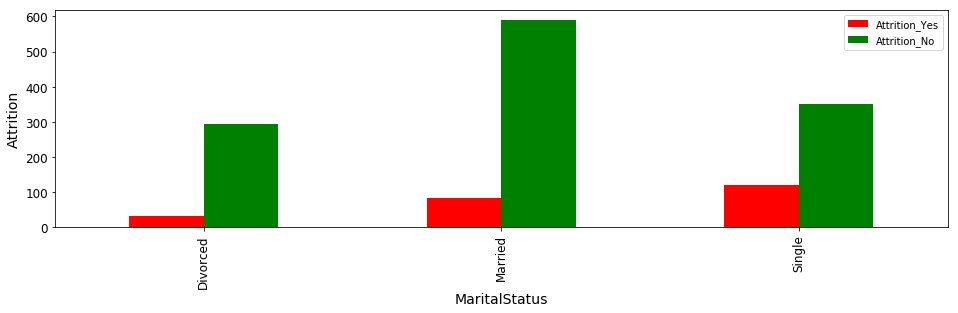

In [16]:
# Plotting of Employee Attrition against MaritalStatus feature
generate_frequency_graph('MaritalStatus')
# We can see Employee Attrition rate for Single is higher than any other.

          Attrition_Yes  Attrition_No  Percentage Attrition
OverTime                                                   
No                  110           944             10.436433
Yes                 127           289             30.528846


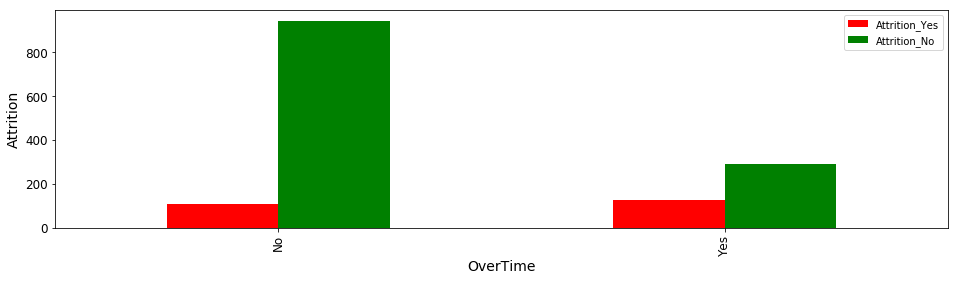

In [17]:
# Plotting of Employee Attrition against MaritalStatus feature
generate_frequency_graph('OverTime')
# It is obivious that employee who are doing overtime has higher attrition rate

We can look into other categorical features like **EducationField, JobRole** the same way and draw inferences which can help us to create new features for our model or which features we need to select for our model.

### Step 3.3 - Exploratory Data Analysis - Ordered Categorical Features
Let's visualize & understand how different ordered categorical features are behaving against attrition indicator i.e. **Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, StockOptionLevel**

           Attrition_Yes  Attrition_No  Percentage Attrition
Education                                                   
1                     31           139             18.235294
2                     44           238             15.602837
3                     99           473             17.307692
4                     58           340             14.572864
5                      5            43             10.416667


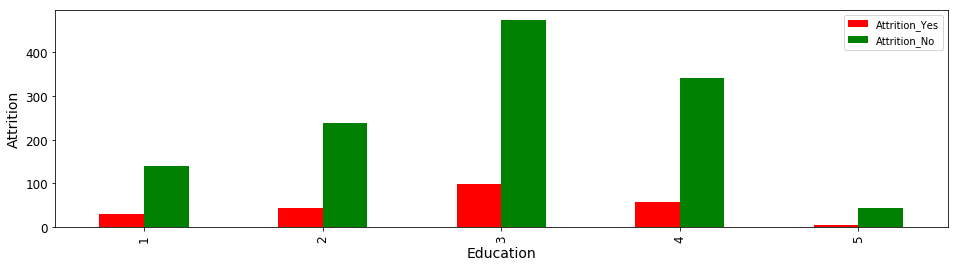

In [18]:
# Plotting of Employee Attrition against Education feature
# 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
generate_frequency_graph('Education')
# We can see Employee Attrition rate is high for Below College & Bachelor

                 Attrition_Yes  Attrition_No  Percentage Attrition
JobSatisfaction                                                   
1                           66           223             22.837370
2                           46           234             16.428571
3                           73           369             16.515837
4                           52           407             11.328976


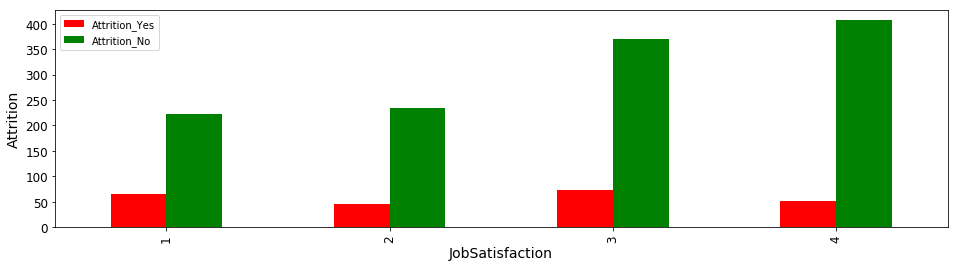

In [19]:
# Plotting of Employee Attrition against Education feature
# 1-Low, 2-Medium, 3-High, 4-Very High
generate_frequency_graph('JobSatisfaction')
# Attrition is directly proportional to JobSatisfaction

                 Attrition_Yes  Attrition_No  Percentage Attrition
WorkLifeBalance                                                   
1                           25            55             31.250000
2                           58           286             16.860465
3                          127           766             14.221725
4                           27           126             17.647059


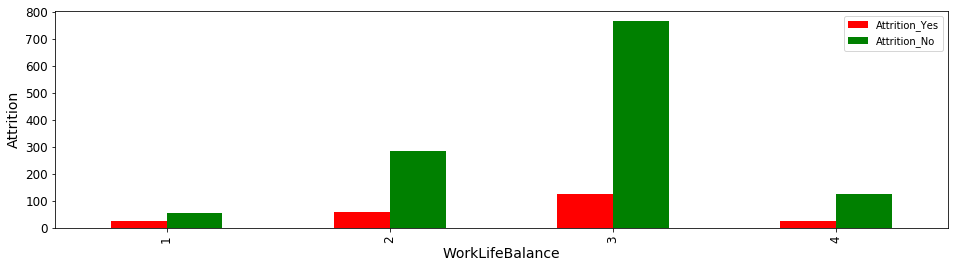

In [20]:
# Plotting of Employee Attrition against Education feature
# 1-Bad, 2-Good, 3-Better, 4-Best
generate_frequency_graph('WorkLifeBalance')
# Attrition rate of Bad work life balance is high, however attrition rate of Best is higher than Good

We can look into other ordered categorical features like **EnvironmentSatisfaction, JobInvolvement, PerformanceRating, RelationshipSatisfaction** the same way and draw inferences which can help us to create new features for our model or which features we need to select for our model.

### Step 3.4 - Exploratory Data Analysis - Numerical Features
Let's visualize data distribution of numerical features. Usually, prediction model works well if the data distribution is normal distribution. So, if there are skewed data distirubtion then we can make them normal distribution through log transformations.

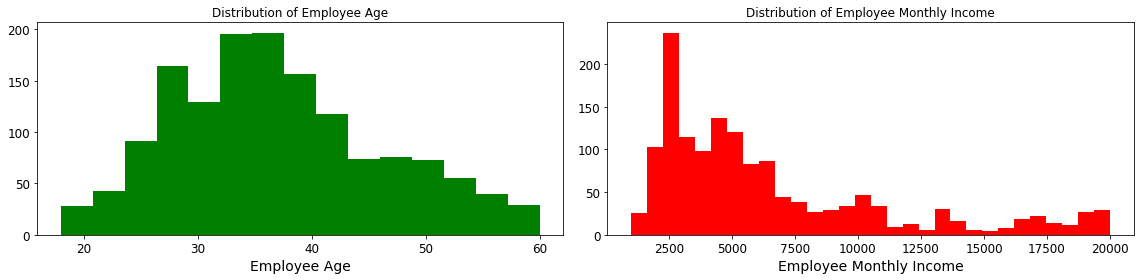

In [21]:
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Employee Age
plt.subplot(1,2,1)
plt.hist(emp_viz_df['Age'], bins=15, color='green')
plt.title('Distribution of Employee Age')
plt.xlabel("Employee Age")

# Histogram Plot for employee Monthly Income
plt.subplot(1,2,2)
plt.hist(emp_viz_df['MonthlyIncome'], bins=30, color='red')
plt.title('Distribution of Employee Monthly Income')
plt.xlabel("Employee Monthly Income")

fig.tight_layout();

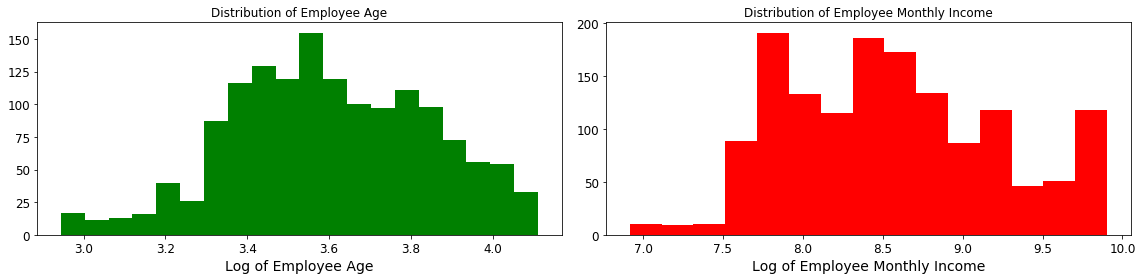

In [22]:
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Employee Age
plt.subplot(1,2,1)
plt.hist(np.log1p(emp_viz_df['Age']), bins=20, color='green')
plt.title('Distribution of Employee Age')
plt.xlabel("Log of Employee Age")

# Histogram Plot for employee Monthly Income
plt.subplot(1,2,2)
plt.hist(np.log1p(emp_viz_df['MonthlyIncome']), bins=15, color='red')
plt.title('Distribution of Employee Monthly Income')
plt.xlabel("Log of Employee Monthly Income")

fig.tight_layout();

In [23]:
print('Skewness in employee Age feature: ', emp_viz_df['Age'].skew())
print('Skewness in employee Monthly Income feature: ', emp_viz_df['MonthlyIncome'].skew())

Skewness in employee Age feature:  0.4132863018563338
Skewness in employee Monthly Income feature:  1.3698166808390662


- We can observe above that without log transformation, "Age" feature looks normally distributed more than "MonthlyIncome" feature.
- Hence, after log transformation, there is hardly any change in "Age" distributions but there is significant transformation in "MonthlyIncome" feature.
- This can also be confirmed by checking the skewness of each feature by applying numpy skew metric and higher the skewness, higher the value.
- So, we will use some threshold value of skewness to carry out log transformation on features with high skewness.

## Step 4 - Feature Engineering
Feature engineering is one aspect which provided a huge impact on the outcome rather than the model. Here, we try at creating new features with the existing variables we have based on my assumptions.

### Step 4.1 - Addition of New Features
- Tenure per job: Usually, people who have worked with many companies but for small periods at every organization tend to leave early as they always need a change of Organization to keep them going.
- Years without Change: For any person, a change either in role or job level or responsibility is needed to keep the work exciting to continue. We create a variable to see how many years it has been for an employee without any sort of change using Promotion, Role and Job Change as a metric to cover different variants of change.
- Compensation Ratio: Compa Ratio is the ratio of the actual pay of an Employee to the midpoint of a salary range. The salary range can be that of his/her department or organization or role. The benchmark numbers can be a organization’s pay or Industry average.

In [27]:
emp_proc_df = emp_data_org.copy() # Copy cleaned dataset for feature engineering

emp_proc_df['TenurePerJob'] = 0

for i in range(0, len(emp_proc_df)):
    if emp_proc_df.loc[i,'NumCompaniesWorked'] > 0:
        emp_proc_df.loc[i,'TenurePerJob'] = emp_proc_df.loc[i,'TotalWorkingYears'] / emp_proc_df.loc[i,'NumCompaniesWorked']

emp_proc_df['YearWithoutChange1'] = emp_proc_df['YearsInCurrentRole'] - emp_proc_df['YearsSinceLastPromotion']
emp_proc_df['YearWithoutChange2'] = emp_proc_df['TotalWorkingYears'] - emp_proc_df['YearsSinceLastPromotion']

monthly_income_median = np.median(emp_proc_df['MonthlyIncome'])
emp_proc_df['CompRatioOverall'] = emp_proc_df['MonthlyIncome'] / monthly_income_median

print('Dataset dimension: {} rows, {} columns'.format(emp_proc_df.shape[0], emp_proc_df.shape[1]))

Dataset dimension: 1470 rows, 39 columns


### Step 4.2 - Remove Unnecessary Observations
- Above we have identified during EDA that there are some features which has only 1 value resulting into very minimal variations. Hence, those observations can be removed. 
- We need to remove **EmployeeNumber, EmployeeCount, StandardHours & Over18** which doesn't have any significance on attrition. We made this inference at the top while describing dataset.

In [28]:
# Features to remove
feat_to_remove = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

emp_proc_df.drop( feat_to_remove , axis = 1, inplace = True )
print('Dataset dimension: {} rows, {} columns'.format(emp_proc_df.shape[0], emp_proc_df.shape[1]))

Dataset dimension: 1470 rows, 35 columns


In [29]:
full_col_names = emp_proc_df.columns.tolist()
num_col_names = emp_proc_df.select_dtypes(include=[np.int64,np.float64]).columns.tolist() # Get numerical feature names

# Preparing list of ordered categorical features
num_cat_col_names = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']

target = ['Attrition']

num_col_names = list(set(num_col_names) - set(num_cat_col_names)) # Numerical features w/o Ordered Categorical features
cat_col_names = list(set(full_col_names) - set(num_col_names) - set(target)) # Categorical & Ordered Categorical features

print('Total number of numerical features: ', len(num_col_names))
print('Total number of categorical & ordered categorical features: ', len(cat_col_names))

cat_emp_df = emp_proc_df[cat_col_names]
num_emp_df = emp_proc_df[num_col_names]

Total number of numerical features:  18
Total number of categorical & ordered categorical features:  16


### Step 4.3 - Transform Numerical Features
In order to fix the skewness, let’s take the log for all numerical features with an absolute skew greater than 80% (Note: log+1, to avoid division by zero issues).

In [30]:
# Let's create dummy variables for each categorical attribute for training our calssification model
for col in num_col_names:
    if num_emp_df[col].skew() > 0.80:
        num_emp_df[col] = np.log1p(num_emp_df[col])

num_emp_df.head()

,TenurePerJob,YearsAtCompany,YearWithoutChange1,MonthlyIncome,NumCompaniesWorked,CompRatioOverall,MonthlyRate,DistanceFromHome,YearsSinceLastPromotion,DailyRate,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,TrainingTimesLastYear,YearWithoutChange2,PercentSalaryHike,HourlyRate,Age
0,0.693147,1.945910,4,8.698514,2.197225,0.796758,19479,0.693147,0.000000,1102,2.197225,1.609438,1.791759,0,2.197225,2.484907,94,41
1,2.397895,2.397895,6,8.543056,0.693147,0.714368,24907,2.197225,0.693147,279,2.397895,2.079442,2.079442,3,2.302585,3.178054,61,49
2,0.773190,0.000000,0,7.645398,1.945910,0.354090,2396,1.098612,0.000000,1373,2.079442,0.000000,0.000000,3,2.079442,2.772589,92,37
3,2.197225,2.197225,4,7.975908,0.693147,0.464602,23159,1.386294,1.386294,1392,2.197225,2.079442,0.000000,3,1.791759,2.484907,56,33
4,0.510826,1.098612,0,8.151622,2.302585,0.533578,16632,1.098612,1.098612,591,1.945910,1.098612,1.098612,3,1.609438,2.564949,40,27


### Step 4.4 - Transform Categorical Features
- Machine Learning model works only on numerical datasets, hence, we need to transform categorical features into numerical features.
- One of the best strategy is to convert each category value into a new column and assigns 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. 
- This approach is also called as **"One Hot Encoding"**. We can use Pandas feature get_dummies to achieve this transformation.
- There is another way to handled **ordered categorical feature** is to give ordered value based on their definitions **i.e Low-Meidum-High would be 1-2-3.** We can try this approach some other time. But, this can be evaluated to check the performance of the model.

In [31]:
# Let's create dummy variables for each categorical attribute for training our calssification model
for col in cat_col_names:
    col_dummies = pd.get_dummies(cat_emp_df[col], prefix=col)
    cat_emp_df = pd.concat([cat_emp_df, col_dummies], axis=1)

# Use the pandas apply method to numerically encode our attrition target variable
attrition_target = emp_proc_df['Attrition'].map({'Yes':1, 'No':0})

# Drop categorical feature for which dummy variables have been created
cat_emp_df.drop(cat_col_names, axis=1, inplace=True)

cat_emp_df.head()

,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,OverTime_No,OverTime_Yes,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,Department_Human Resources,Department_Research & Development,Department_Sales,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1


### Step 4.5 - Correlation of Numerical Features against Attrition

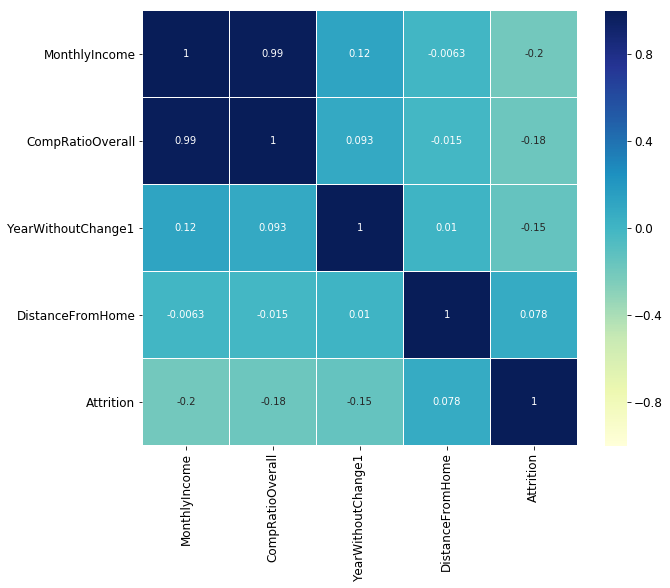

In [32]:
num_corr_df = num_emp_df[['MonthlyIncome', 'CompRatioOverall', 'YearWithoutChange1', 'DistanceFromHome']]
corr_df = pd.concat([num_corr_df, attrition_target], axis=1)
corr = corr_df.corr()

plt.figure(figsize = (10, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
#sns.heatmap(data=corr, annot=True, mask=mask, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu")
sns.heatmap(data=corr, annot=True, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

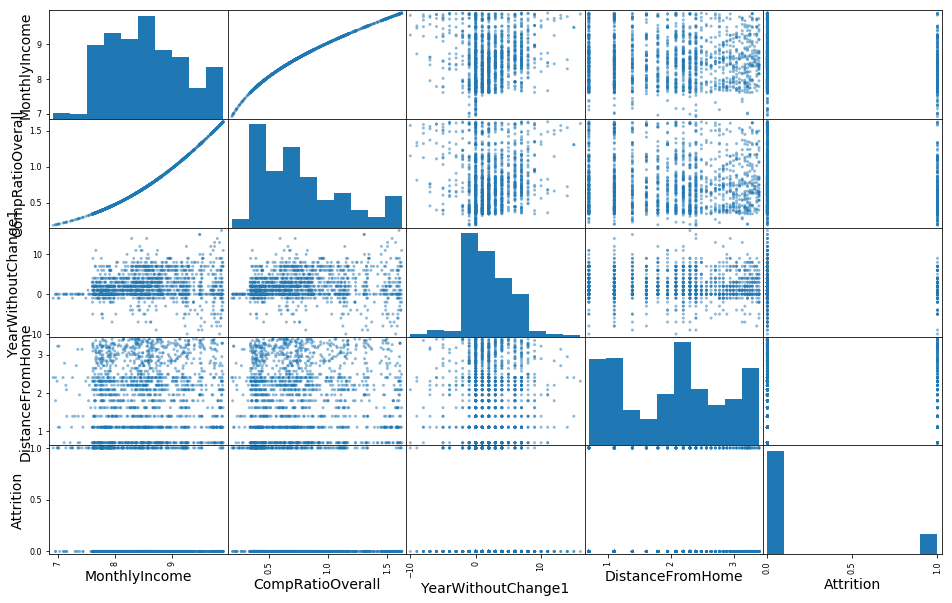

In [33]:
# Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function,

from pandas.plotting import scatter_matrix

scatter_matrix(corr_df, figsize=(16, 10));

In [34]:
# Concat the two dataframes together columnwise
final_emp_df = pd.concat([num_emp_df, cat_emp_df], axis=1)

print('Dataset dimension after treating categorical features with dummy variables: {} rows, {} columns'.format(final_emp_df.shape[0], final_emp_df.shape[1]))
final_emp_df.head()

Dataset dimension after treating categorical features with dummy variables: 1470 rows, 82 columns


,TenurePerJob,YearsAtCompany,YearWithoutChange1,MonthlyIncome,NumCompaniesWorked,CompRatioOverall,MonthlyRate,DistanceFromHome,YearsSinceLastPromotion,DailyRate,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,TrainingTimesLastYear,YearWithoutChange2,PercentSalaryHike,HourlyRate,Age,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,OverTime_No,OverTime_Yes,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,Department_Human Resources,Department_Research & Development,Department_Sales,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4
0,0.693147,1.945910,4,8.698514,2.197225,0.796758,19479,0.693147,0.000000,1102,2.197225,1.609438,1.791759,0,2.197225,2.484907,94,41,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
1,2.397895,2.397895,6,8.543056,0.693147,0.714368,24907,2.197225,0.693147,279,2.397895,2.079442,2.079442,3,2.302585,3.178054,61,49,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,0.773190,0.000000,0,7.645398,1.945910,0.354090,2396,1.098612,0.000000,1373,2.079442,0.000000,0.000000,3,2.079442,2.772589,92,37,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
3,2.197225,2.197225,4,7.975908,0.693147,0.464602,23159,1.386294,1.386294,1392,2.197225,2.079442,0.000000,3,1.791759,2.484907,56,33,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,0.510826,1.098612,0,8.151622,2.302585,0.533578,16632,1.098612,1.098612,591,1.945910,1.098612,1.098612,3,1.609438,2.564949,40,27,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1


## Step 5 - Model Building and Validation
Since, we have to predict a binary class, we will be using classification models for training & predicting Employee Attrition. We need to keep in mind that our focus should be to have a better accuracy of predicting attrition i.e. Attrition = 1 which in confusion matrix will be "True Positive". However, we should not forget the prediction accuracy of not qualifying for attrition i.e. Attrition = 0 which will be "True Negative" in confusion matrix.

So, we need to focus on four parameters:
- **Accuracy:** Overall, how often is the classifier correct? i.e {(TP+TN)/Total}
- **True Positive Rate:** When it's actually yes, how often does it predict yes? default_ind = 1, {TP/Actual YES}, this is also known as "Sensitivity" or "Recall"
- **Precision:** When it predicts yes, how often is it correct? i.e. {TP/(TP+FP)}
- **Specificity:** When it's actually no, how often does it predict no? default_ind = 0, {TN/actual NO}
- **Cross Validation Score:** Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Do this for k folds and take mean of accuracy scores of the k fold models.
- **F1 Score:** This is a weighted average of the true positive rate (recall) and precision.
- **ROC Curve:** This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. 

Above information was taken and more details can be found at https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

### Step 5.1 - Prepare Train & Test Dataset
The data should be divided into train and test data. We will use train_test_split feature to divide the data and we will be using 70-30 ratio

In [39]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
X_train, X_val, y_train, y_val = train_test_split(final_emp_df, attrition_target,
                                                  test_size= 0.30, random_state=42);

print("Stratified Sampling: ", len(X_train), "train set +", len(X_val), "validation set")

# Stratified Splitting
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
#for train_index, test_index in split.split(emp_data_proc, emp_data_proc['Gender']):
#    strat_train_set = emp_data_proc.loc[train_index]
#    strat_test_set = emp_data_proc.loc[test_index]

Stratified Sampling:  1029 train set + 441 validation set


In [40]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score

In [41]:
def gen_model_performance(actual_target, pred_target):
    model_conf_matrix = confusion_matrix(actual_target, pred_target)
    model_roc_score = roc_auc_score(actual_target, pred_target)
    model_accuracy = accuracy_score(actual_target, pred_target) * 100.0
    
    TP = model_conf_matrix[1][1]; TN = model_conf_matrix[0][0]; 
    FP = model_conf_matrix[0][1]; FN = model_conf_matrix[1][0];
    sensitivity = TP / float(TP + FN) * 100.0; specificity = TN / float(TN + FP) * 100.0;
    precision = TP / float(TP + FP) * 100.0;
    
    return sensitivity, specificity, model_accuracy, precision, model_roc_score

In [42]:
def evaluate_model_score(X, y, scoring='accuracy'):
    
    logreg_model = LogisticRegression(random_state=0)
    logreg_cv_model = LogisticRegressionCV()
    rfc_model = RandomForestClassifier()
    extrees_model = ExtraTreesClassifier()
    gboost_model = GradientBoostingClassifier()
    dt_model = DecisionTreeClassifier()
    aboost_model = AdaBoostClassifier()
    gnb_model = GaussianNB()

    models = [logreg_model, logreg_cv_model, dt_model, rfc_model, 
              extrees_model, gboost_model, aboost_model, gnb_model]
    
    model_results = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "CV Score",
                                            "Sensitivity","Specificity","ROC Score"])
    
    for model in models:
        model.fit(X, y,)
        y_pred = model.predict(X)
        score = cross_val_score(model, X, y, cv=5, scoring=scoring)
        
        sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y, y_pred)
    
        scores = cross_val_score(model, X, y, cv=5)
    
        model_results = model_results.append({"Model": model.__class__.__name__,
                              "Accuracy": accuracy, "Precision": precision,
                              "CV Score": scores.mean()*100.0,
                              "Sensitivity": sensitivity, "Specificity": specificity,
                              "ROC Score": roc_score}, ignore_index=True)
    return model_results

### Step 5.3 - Train Models & Evaluate through Cross-Validation
We will train number of  classification models i.e. Logistic Regression, Decision Tree Classifier, Random Forest Classifier, ExtraTrees Classifier, Boosting Classifier and Naive Bayes. Once we build all the models, we will identify the best performer through accuracy, CV score, sensitivity & specificity parameters.

In [47]:
model_results = evaluate_model_score(X_train, y_train)

model_results

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,91.253644,87.719298,87.849765,56.818182,98.358734,0.775885
1,LogisticRegressionCV,90.281827,84.545455,88.433236,52.840909,98.007034,0.754240
2,DecisionTreeClassifier,100.000000,100.000000,77.837369,100.000000,100.000000,1.000000
3,RandomForestClassifier,97.764820,99.354839,85.713346,87.500000,99.882767,0.936914
4,ExtraTreesClassifier,100.000000,100.000000,84.835771,100.000000,100.000000,1.000000
5,GradientBoostingClassifier,96.209913,100.000000,85.518210,77.840909,100.000000,0.889205
6,AdaBoostClassifier,90.573372,84.955752,86.199261,54.545455,98.007034,0.762762
7,GaussianNB,76.287658,39.696970,76.085524,74.431818,76.670574,0.755512


- We can observe 3 models which performs very well i.e. RandomForestClassifier, GradientBoostingClassifier & AdaBoostClassifier.
- Out of 3 models, we can see cross validation score of AdaBoostClassifier is best and Sensitivity i.e. Recall rate of  RandomForestClassifier is the best.
- Our goal is to identify whether employee will leave or not i.e. Attrition=1 which means our Sensitivity metric is the main evaluation metric along with Precision and Accuracy.
- Even though DecisionTreeClassifier & ExtraTreesClassifier has 100% Accuracy which means model is overfitting, hence not selected.

### Step 5.4 - Feature Selection Through Ensemble Model
Feature selection can also be acheived by the insights provided by some Machine Learning models. Tree based models calculates feature importance for they need to keep the best performing features as close to the root of the tree. The feature importance in tree based models are calculated based on Gini Index, Entropy or Chi-Square value. We will be using basic random forest classifier and extract the features based on their importances.

In [48]:
rfc_model = RandomForestClassifier();

refclasscol = X_train.columns

# fit random forest classifier on the training set
rfc_model.fit(X_train, y_train);

# extract important features
score = np.round(rfc_model.feature_importances_, 3)
importances = pd.DataFrame({'feature':refclasscol, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# random forest classifier parameters used for feature importances
print(rfc_model)

# plot importances
#importances.plot.bar();

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


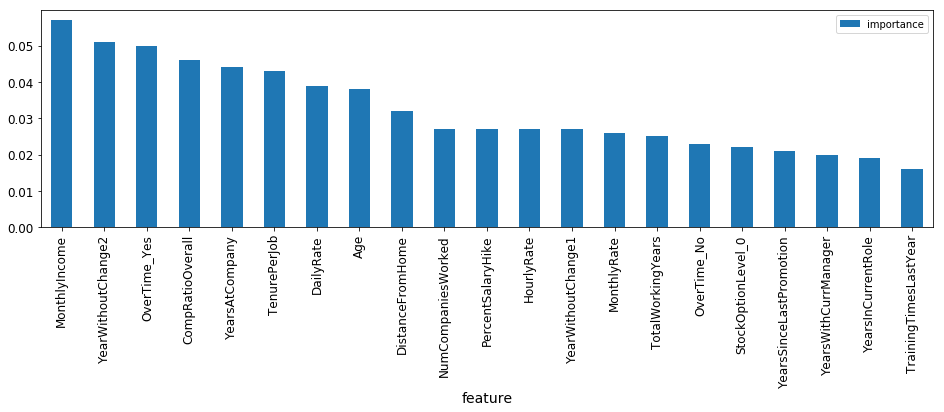

In [49]:
high_imp_df = importances[importances.importance>=0.015]
high_imp_df.plot.bar();
del high_imp_df

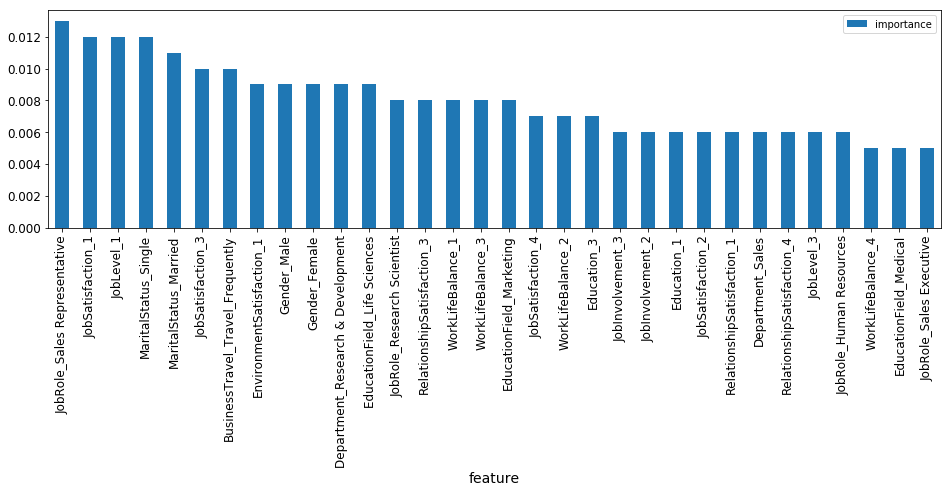

In [50]:
mid_imp_df = importances[importances.importance<=0.015]
mid_imp_df = mid_imp_df[mid_imp_df.importance>=0.0050]
mid_imp_df.plot.bar();
del mid_imp_df

In [51]:
selection = SelectFromModel(rfc_model, threshold = 0.002, prefit=True)

X_train_select = selection.transform(X_train)
X_val_select = selection.transform(X_val)

print('Train dataset dimension before Feature Selection: {} rows, {} columns'.format(X_train.shape[0], X_train.shape[1]))
print('Train dataset dimension after Feature Selection: {} rows, {} columns'.format(X_train_select.shape[0], X_train_select.shape[1]))

Train dataset dimension before Feature Selection: 1029 rows, 82 columns
Train dataset dimension after Feature Selection: 1029 rows, 72 columns


### Step 5.5 - Train Feature Selected Models & Evaluate through Cross-Validation
We will train number of  classification models i.e. Logistic Regression, Decision Tree Classifier, Random Forest Classifier, ExtraTrees Classifier, Boosting Classifier and Naive Bayes. Once we build all the models, we will identify the best performer through accuracy, CV score, sensitivity & specificity parameters.

In [52]:
model_results = evaluate_model_score(X_train_select, y_train)

model_results

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,90.962099,87.387387,88.434657,55.113636,98.358734,0.767362
1,LogisticRegressionCV,88.241011,91.044776,87.367634,34.659091,99.296600,0.669778
2,DecisionTreeClassifier,100.000000,100.000000,76.964989,100.000000,100.000000,1.000000
3,RandomForestClassifier,98.639456,100.000000,84.738674,92.045455,100.000000,0.960227
4,ExtraTreesClassifier,100.000000,100.000000,84.644428,100.000000,100.000000,1.000000
5,GradientBoostingClassifier,96.404276,100.000000,85.906095,78.977273,100.000000,0.894886
6,AdaBoostClassifier,90.379009,83.478261,86.685171,54.545455,97.772567,0.761590
7,GaussianNB,81.341108,46.899225,79.291339,68.750000,83.939039,0.763445


- We can see that after feature selection based on random forest classifier technique, metrics of random forest model has improved.
- There are similar feature selection mechanism for GradientBoostingClassifier & AdaBoostClassifier models which cna be used to improve their model respectively. However, we can leave that for the next part.
### Step 5.6 - Model Performance on Validation Dataset
For checking model performance sake, we can choose RandomForest Classifier as final model and build the model on training dataset. Once the model is built, let's see its performance on validation dataset which was never seen by this model. This will give us the true picture of the model, how it performs on unseen new data and what is the accuracy of prediction.

In [54]:
final_rfc_model = RandomForestClassifier()
final_rf_scores = cross_val_score(final_rfc_model, X_train_select, y_train, cv=5)

final_rfc_model.fit(X_train_select, y_train)
y_trn_pred = final_rfc_model.predict(X_train_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train, y_trn_pred)

print("Train Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, final_rf_scores.mean()*100.0, sensitivity, specificity))
print('***************************************************************************************\n')

y_val_pred = final_rfc_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_val, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, sensitivity, specificity))
print('***************************************************************************************\n')

Train Accuracy: 98.35%, Precision: 100.00%, CV Mean Score=84.16%, Sensitivity=90.34%, Specificity=100.00%
***************************************************************************************

Validation Accuracy: 87.30%, Precision: 72.73%, Sensitivity=13.11%, Specificity=99.21%
***************************************************************************************



## Step 6 - Handling Target Class Imbalance
- We can observe that accuracy, precision, etc. metrics are performing very good on training dataset, however, on validation dataset recall & precision of attrition drops down significantly.
- This is happening due to imbalance class. Model doesn't have enough observations to train on employees who have left i.e. attrition = 'Yes'
- Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

### 6.1 SMOTE to Oversample Target Variable

In [55]:
from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampler.fit_sample(X_train_select, y_train)

### Step 6.2 - Train Models & Evaluate through Cross-Validation for SMOTE Dataset
We will train number of  classification models i.e. Logistic Regression, Decision Tree Classifier, Random Forest Classifier, ExtraTrees Classifier, Boosting Classifier and Naive Bayes. Once we build all the models, we will identify the best performer through accuracy, CV score, sensitivity & specificity parameters.

In [56]:
model_results = evaluate_model_score(X_train_smote, y_train_smote)

model_results

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,83.645955,82.687927,82.115583,85.111372,82.180539,0.836460
1,LogisticRegressionCV,81.594373,80.520951,80.179911,83.352872,79.835873,0.815944
2,DecisionTreeClassifier,100.000000,100.000000,82.721018,100.000000,100.000000,1.000000
3,RandomForestClassifier,99.003517,99.880668,89.405229,98.124267,99.882767,0.990035
4,ExtraTreesClassifier,100.000000,100.000000,92.387341,100.000000,100.000000,1.000000
5,GradientBoostingClassifier,97.538101,99.632803,87.706570,95.427902,99.648300,0.975381
6,AdaBoostClassifier,93.376319,94.794189,86.242862,91.793669,94.958968,0.933763
7,GaussianNB,76.963658,72.727273,76.727554,86.283705,67.643611,0.769637


- We can observe that after applying SMOTE technique the accuracy of all the models have increased including Sensitivity & Precision metrics.
### Step 6.3 - Model Performance on Validation Dataset
For checking model performance sake, we can choose RandomForest Classifier as final model and build the model on training dataset which was transformed by SMOTE mechanism. Once the model is built, let's see its performance on validation dataset which was never seen by this model. This will give us the true picture of the model, how it performs on unseen new data and what is the accuracy of prediction.

In [57]:
final_rfc_model = RandomForestClassifier()
final_rf_scores = cross_val_score(final_rfc_model, X_train_smote, y_train_smote, cv=5)

final_rfc_model.fit(X_train_smote, y_train_smote)
y_trn_pred = final_rfc_model.predict(X_train_smote)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train_smote, y_trn_pred)

print("Train Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, final_rf_scores.mean()*100.0, sensitivity, specificity))
print('***************************************************************************************\n')

y_val_pred = final_rfc_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_val, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, sensitivity, specificity))
print('***************************************************************************************\n')

Train Accuracy: 99.71%, Precision: 100.00%, CV Mean Score=88.53%, Sensitivity=99.41%, Specificity=100.00%
***************************************************************************************

Validation Accuracy: 86.39%, Precision: 52.00%, Sensitivity=21.31%, Specificity=96.84%
***************************************************************************************



## Step 7 - Identify Best Hyper-Parameters of Model
Once the model is build, we can tune the hyper-parameters of the model to get the best score and parameters. This will help us in getting better accuracy model. This can be achieved by **GridSearchCV** library by passing a range of values for different parameters.

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Hyperparameters Tuning for Random Forest
rfc_param_grid = {
                 'max_depth' : [None, 4, 6, 8],
                 'n_estimators': [10, 30, 50],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 }
rfc_best_model = RandomForestClassifier()
rfc_cross_val = StratifiedKFold(n_splits=5)

rfc_grid_search = GridSearchCV(rfc_best_model,
                               scoring='accuracy',
                               param_grid=rfc_param_grid,
                               cv=rfc_cross_val,
                               verbose=1)

rfc_grid_search.fit(X_train_smote, y_train_smote)
rfc_model = rfc_grid_search
rfc_parameters = rfc_grid_search.best_params_

rfc_best_model = RandomForestClassifier(**rfc_parameters)

scores = cross_val_score(rfc_best_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    
print('Cross-validation of : {0}'.format(rfc_best_model.__class__))
print('After Hyperparameters tuning CV score = {0}'.format(np.mean(scores) * 100.0))
print('Best score: {}'.format(rfc_grid_search.best_score_))
print('Best parameters: {}'.format(rfc_grid_search.best_params_))

rfc_best_model.fit(X_train_smote, y_train_smote)
y_trn_pred = rfc_best_model.predict(X_train_smote)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train_smote, y_trn_pred)

print("\nTrain Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, scores.mean()*100.0, sensitivity, specificity))
print('***************************************************************************************\n')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  2.3min finished


Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
After Hyperparameters tuning CV score = 89.58101135190918
Best score: 0.9015240328253223
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}

Train Accuracy: 99.94%, Precision: 100.00%, CV Mean Score=89.58%, Sensitivity=99.88%, Specificity=100.00%
***************************************************************************************



In [59]:
y_val_pred = rfc_best_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_val, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, sensitivity, specificity))
print('***************************************************************************************\n')

Validation Accuracy: 86.85%, Precision: 60.00%, Sensitivity=14.75%, Specificity=98.42%
***************************************************************************************



After SMOTE mechanism to improve target class imbalance and identifying best hyper-parameters, we were able to improve the metrics of training model, however, validation metrics are improved slightly specially Sensitivity has very little impact.

So, we can do more permutations & combinations w.r.t feature engineering, feature selection, hyper-parameters tuning, class imbalance, etc. to identify the best model that generates best metrics on validation dataset.